In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # 统计数据可视化
from scipy import stats
from sklearn.decomposition import PCA
# 绘图风格： style= ["darkgrid"，"whitegrid"，"dark"，"white"，"ticks"]，默认darkgrid
sns.set_style(style="darkgrid")
# 颜色风格： themes = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']
sns.set_palette(palette='bright')
ChinaFonts = {"黑体": "simhei", "宋体": "simsun", "华文楷体": "STKAITI"}
plt.rcParams["font.sans-serif"] = ChinaFonts["黑体"]  # 解决中文乱码问题
plt.rcParams["axes.unicode_minus"] = False  # 解决负号无法正常显示的问题
path_data = "/home/carton/workspace/python/Multivariate-statistical-analysis/database/第二次作业/"  # 设置 数据路径
path_pic = "/home/carton/workspace/python/Multivariate-statistical-analysis/save-database/第二次作业/"  # 设置 图像保存路径

In [4]:
file_path = path_data + "homework2.xlsx"
df_data = pd.read_excel(file_path, sheet_name="2017", index_col=0) # 读取数据，指定第1列为索引
df_data.head() # 显示前5个记录，观察数据读取是否正确

,法人数,就业人员数,工资总额,非私营平均工资,私营平均工资
行业,,,,,
农、林牧、渔业,1926771,255.4,949.9,36504,34272
采矿业,108900,455.4,3208.6,69500,41236
制造业,3483617,4635.5,29740.5,64452,44991
电力、热力、燃气及水生产和供应业,120736,377.0,3406.6,90348,41510
建筑业,1045232,2643.2,14283.9,56568,46944


In [5]:
stats_dic = { "mean": "均值", "std": "标准差", "max": "极大值", "min": "极小值","skew":"偏度", "kurt":"峰度"}
df_data_stats = df_data.apply(stats_dic.keys())
df_data_stats = df_data_stats.rename(index=stats_dic) # 采用字典将指标替换为中文
df_data_stats.T.round(2)

,均值,标准差,极大值,极小值,偏度,峰度
法人数,1134364.28,1554920.27,6252424.0,108900.0,2.51,6.77
就业人员数,884.35,1124.21,4635.5,78.2,2.64,7.38
工资总额,6451.97,7111.12,29740.5,390.2,2.34,6.43
非私营平均工资,77371.06,25875.09,133150.0,36504.0,0.59,0.09
私营平均工资,45861.83,8428.61,70415.0,34272.0,1.54,3.33


In [6]:
df_zscore1 = (df_data - df_data.mean())/df_data.std(ddof=1)
df_zscore1.head().round(4)

,法人数,就业人员数,工资总额,非私营平均工资,私营平均工资
行业,,,,,
农、林牧、渔业,0.5096,-0.5595,-0.7737,-1.5794,-1.3751
采矿业,-0.6595,-0.3816,-0.4561,-0.3042,-0.5488
制造业,1.5109,3.3367,3.2749,-0.4993,-0.1033
电力、热力、燃气及水生产和供应业,-0.6519,-0.4513,-0.4283,0.5015,-0.5163
建筑业,-0.0573,1.5645,1.1014,-0.8040,0.1284


In [7]:
df_corr = df_data.corr()
df_corr.head().round(4)

,法人数,就业人员数,工资总额,非私营平均工资,私营平均工资
法人数,1.0000,0.3643,0.3317,-0.1699,-0.0551
就业人员数,0.3643,1.0000,0.9763,-0.1139,0.0255
工资总额,0.3317,0.9763,1.0000,0.0611,0.1383
非私营平均工资,-0.1699,-0.1139,0.0611,1.0000,0.8255
私营平均工资,-0.0551,0.0255,0.1383,0.8255,1.0000


<AxesSubplot: >

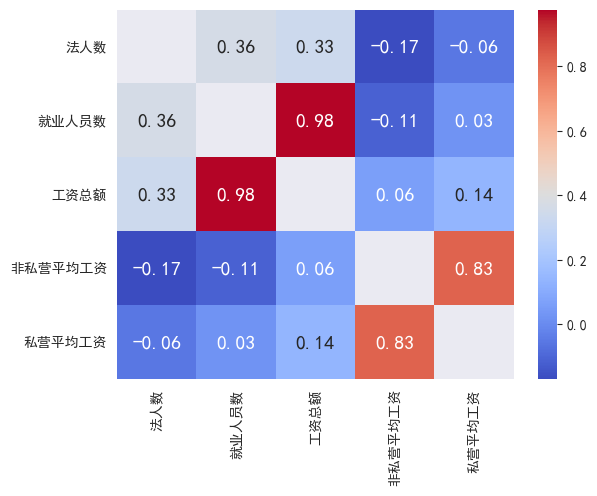

In [8]:
sns.heatmap(df_data.corr(),annot=True,fmt=".2f", cmap="coolwarm",annot_kws={ "size":14},mask=(df_data.corr()==1))

In [9]:
W,V = np.linalg.eig(df_corr) # 计算特征值和特征向量
sort_id = np.argsort(W)[::-1] # 升序排序后，逆转
W = W[sort_id]; V = V[:,sort_id]
print(W); print(V)
print("特征值之和为：{:.2f}".format(sum(W)))

[2.19025966 1.86343583 0.76998763 0.16985824 0.00645865]
[[-0.3886859  -0.13158441  0.90873176  0.07625266 -0.0009653 ]
 [-0.6545706   0.00892417 -0.27064354 -0.10464567 -0.69803943]
 [-0.64433361  0.12013464 -0.27078746  0.15869252  0.68694447]
 [ 0.06901654  0.69711811  0.07279269  0.68491219 -0.18670716]
 [-0.02305481  0.69440615  0.14944576 -0.6992473   0.07738054]]
特征值之和为：5.00


In [10]:
pca_data = PCA() # 建立模型，用 PCA(n_components=2) 可指定主成分数目
df_tem = df_data.apply(stats.zscore,ddof=1) # 前面进行标准化处理的数据集
principalComponents=pca_data.fit_transform(df_tem)# 训练模型得PCA参数、得分
col_name = ["特征"+str(i) for i in range(1,pca_data.n_components_+1)]
# 自动生成 特征名称
df_res = pd.DataFrame(pca_data.components_.T, columns=col_name, index=df_data.columns[0:]) # 先转置，列为 特征名称, 行为变量名
df_res.loc["特征值",:] = pca_data.n_components_ * pca_data.explained_variance_ / pca_data.explained_variance_.sum()# 归一化处理， (若为协方差矩阵)原始数据 之和 不等于 变量个数
df_res.loc["贡献率",:] = pca_data.explained_variance_ratio_
df_res.loc["累计贡献率",:] = np.cumsum(pca_data.explained_variance_ratio_)
display(df_res)

,特征1,特征2,特征3,特征4,特征5
法人数,0.388686,-0.131584,0.908732,0.076253,0.000965
就业人员数,0.654571,0.008924,-0.270644,-0.104646,0.698039
工资总额,0.644334,0.120135,-0.270787,0.158693,-0.686944
非私营平均工资,-0.069017,0.697118,0.072793,0.684912,0.186707
私营平均工资,0.023055,0.694406,0.149446,-0.699247,-0.077381
特征值,2.190260,1.863436,0.769988,0.169858,0.006459
贡献率,0.438052,0.372687,0.153998,0.033972,0.001292
累计贡献率,0.438052,0.810739,0.964737,0.998708,1.000000


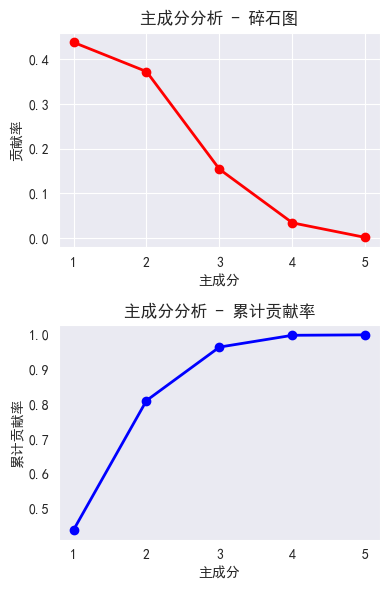

In [11]:
PC_values = np.arange(pca_data.n_components_)+1 # 主成分顺序
fig, axes = plt.subplots(2,1, figsize=(4,6))
axes[0].plot(PC_values, df_res.loc["贡献率",:], 'ro-', linewidth=2)
axes[0].set_xticks(PC_values)
axes[0].set_title('主成分分析 - 碎石图')
axes[0].set_xlabel('主成分'); axes[0].set_ylabel('贡献率')
axes[1].plot(PC_values, df_res.loc["累计贡献率",:], 
'bo-', linewidth=2)
axes[1].set_xticks(PC_values)
axes[1].set_title('主成分分析 - 累计贡献率')
axes[1].set_xlabel('主成分'); axes[1].set_ylabel('累计贡献率')
plt.grid() # 添加网格
plt.tight_layout() # 调整多图间距，避免重叠
plt.show()

Text(0.5, 1.0, '主成分1 和 主成分2 得分含义')

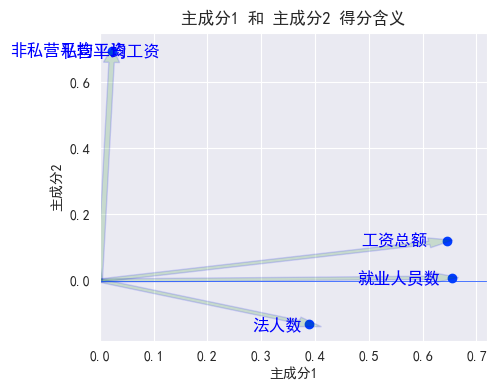

In [12]:
plt.subplots(figsize=(5,4)) # 绘制 成分散点图 —— 分析内涵
c_x = df_res.loc[df_data.columns[0:],"特征1"] # 提取特征数据
c_y = df_res.loc[df_data.columns[0:],"特征2"]
plt.scatter(c_x,c_y)
plt.xlim(0,np.max(c_x)*1.1) # 将绘图范围放宽，以免文字被挤压
for i in range(len(c_x)):
    plt.arrow(0, 0,c_x[i]*0.95, c_y[i]*0.95, color='b', alpha=0.15, width=0.01,fc='g')
    plt.text(c_x[i]*0.85, c_y[i], df_data.columns[i], color='b', ha='center', va='center',fontsize=12)
plt.xlabel("主成分{}".format(1))
plt.ylabel("主成分{}".format(2))
plt.hlines(0,0,np.max(c_x)*1.1, linewidth=0.5)
plt.title("主成分{} 和 主成分{} 得分含义".format(1,2))

Text(0.5, 1.0, '特征向量热力图')

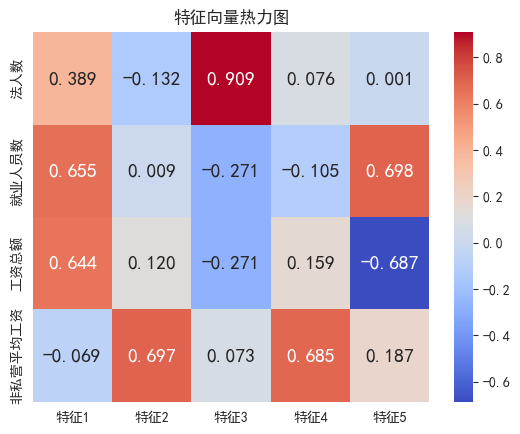

In [13]:
sns.heatmap(df_res.head(4), annot=True, fmt=".3f", annot_kws={ "size":14},cmap="coolwarm") # 提取特征向量值
plt.title("特征向量热力图")

In [14]:
df_pc = pd.DataFrame(data=principalComponents, columns=col_name) # 主成分得分值
df_pc = df_pc.set_index(df_data.index).copy() # 重新设置序号，以原始数据序号为准
df_pc

,特征1,特征2,特征3,特征4,特征5
行业,,,,,
农、林牧、渔业,-0.589363,-2.220877,0.503566,-0.145623,-0.047008
采矿业,-0.791631,-0.564586,-0.476696,0.092679,0.032008
制造业,4.913592,-0.195398,-0.468699,0.016023,-0.004320
电力、热力、燃气及水生产和供应业,-0.871239,0.021389,-0.394936,0.634089,0.112126
建筑业,1.769906,-0.317496,-0.813091,-0.633747,0.175425
批发和零售业,1.219298,-0.896234,2.939619,0.371603,0.010598
交通运输、仓储和邮政业,-0.152141,0.131077,-0.340692,0.057769,-0.033987
住宿和餐饮业,-0.963930,-1.620897,-0.341145,-0.188750,-0.024034
信息传输、软件和信息技术服务业,-0.583687,3.535712,0.515050,-0.563316,-0.005689


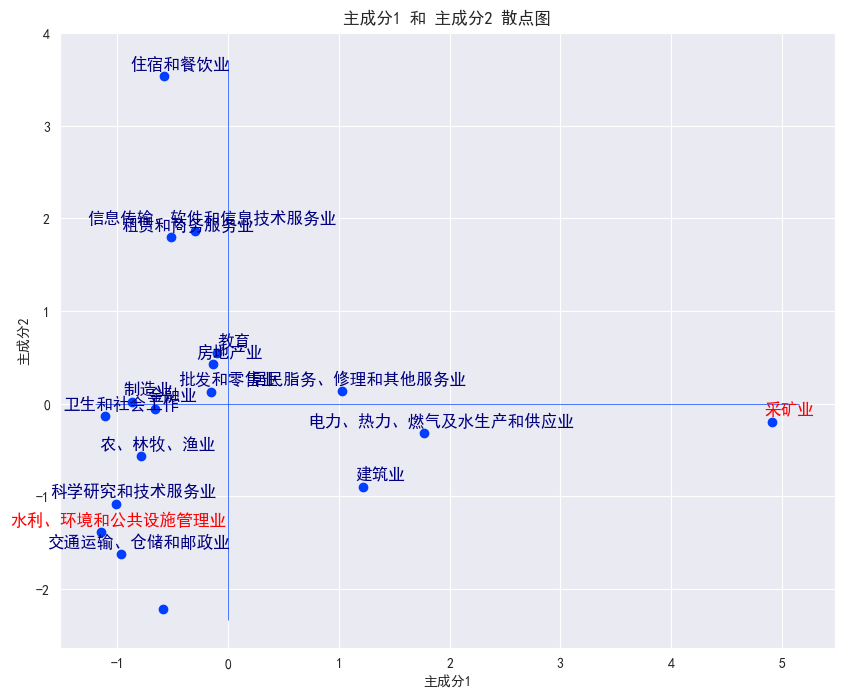

<Figure size 1920x1440 with 0 Axes>

In [15]:
plt.subplots(figsize=(10,8)) # 绘制 成分得分值图 —— 分析内涵
p_x=df_pc.iloc[:,0]; p_y=df_pc.iloc[:,1] # 选择主成分
R_x = np.max(p_x)-np.min(p_x) # range of p_x
R_y = np.max(p_y)-np.min(p_y) # range of p_y
plt.scatter(p_x,p_y)
d_pian = 0.05 # 标注文字时做一定偏移，避免覆盖散点
for i in range(1,len(df_pc)):
    if np.max(p_x) == p_x[i] or np.min(p_x) == p_x[i]:
        plt.text(p_x[i] + R_x*d_pian/2, p_y[i]+ R_y*d_pian/2, df_pc.index[i-1], color='red', ha='center', va='center',fontsize=12)
    else:
        plt.text(p_x[i] + R_x*d_pian/2, p_y[i]+ R_y*d_pian/2, df_pc.index[i-1], color='navy', ha='center', va='center',fontsize=12)
plt.xlabel("主成分{}".format(1)); plt.ylabel("主成分{}".format(2))
plt.hlines(0,np.min(p_x)*(1+d_pian),np.max(p_x)*(1+d_pian), linewidth=0.5)
plt.vlines(0,np.min(p_y)*(1+d_pian),np.max(p_y)*(1+d_pian), linewidth=0.5)
plt.title("主成分{} 和 主成分{} 散点图".format(1,2))
plt.figure(dpi=300)
plt.show()

In [16]:
# 去掉df_res中的特征3-5
df_res = df_res.drop(["特征3", "特征4", "特征5"], axis=1)
df_pc = df_pc.drop(["特征3", "特征4", "特征5"], axis=1)

In [17]:
df_pc["总得分"] = df_pc["特征1"]/df_res.loc["特征值", "特征1"] + \
    df_pc["特征2"]/df_res.loc["特征值", "特征2"]
df_pc = df_pc.drop(["特征1", "特征2"], axis=1)
df_pc

,总得分
行业,
农、林牧、渔业,-1.460902
采矿业,-0.664414
制造业,2.138524
电力、热力、燃气及水生产和供应业,-0.386300
建筑业,0.637698
批发和零售业,0.075733
交通运输、仓储和邮政业,0.000879
住宿和餐饮业,-1.309941
信息传输、软件和信息技术服务业,1.630923


In [18]:
file_path = path_data + "homework2.xlsx"
df_data2 = pd.read_excel(file_path, sheet_name="2019", index_col=0) # 读取数据，指定第1列为索引




In [19]:
pca_data2 = PCA() # 建立模型，用 PCA(n_components=2) 可指定主成分数目
df_tem2 = df_data2.apply(stats.zscore,ddof=1) # 前面进行标准化处理的数据集
principalComponents2=pca_data2.fit_transform(df_tem2)# 训练模型得PCA参数、得分
col_name2 = ["特征"+str(i) for i in range(1,pca_data2.n_components_+1)]
# 自动生成 特征名称
df_res2 = pd.DataFrame(pca_data2.components_.T, columns=col_name2, index=df_data2.columns[0:]) # 先转置，列为 特征名称, 行为变量名
df_res2.loc["特征值",:] = pca_data2.n_components_ * pca_data2.explained_variance_ / pca_data2.explained_variance_.sum()# 归一化处理， (若为协方差矩阵)原始数据 之和 不等于 变量个数
df_res2.loc["贡献率",:] = pca_data2.explained_variance_ratio_
df_res2.loc["累计贡献率",:] = np.cumsum(pca_data2.explained_variance_ratio_)
display(df_res2)

,特征1,特征2,特征3,特征4,特征5
法人数,0.243999,-0.322478,0.914487,-0.008894,-0.010330
就业人员数,0.579121,-0.327535,-0.262805,-0.066239,0.695619
工资总额,0.628237,-0.199540,-0.244364,0.151425,-0.694880
非私营平均工资,0.291392,0.630345,0.153148,0.680456,0.176863
私营平均工资,0.354248,0.592940,0.107140,-0.713851,-0.043230
特征值,2.203632,1.857764,0.807859,0.119746,0.010999
贡献率,0.440726,0.371553,0.161572,0.023949,0.002200
累计贡献率,0.440726,0.812279,0.973851,0.997800,1.000000


In [20]:
df_pc2 = pd.DataFrame(data=principalComponents2, columns=col_name2) # 主成分得分值
df_pc2 = df_pc2.set_index(df_data2.index).copy() # 重新设置序号，以原始数据序号为准
df_pc2

,特征1,特征2,特征3,特征4,特征5
行业,,,,,
农、林牧、渔业,-1.922831,-1.559209,0.314883,-0.243120,-0.111921
采矿业,-0.953039,0.267932,-0.432854,0.218145,0.056537
制造业,3.858123,-2.373522,-0.513099,0.024357,0.009783
电力、热力、燃气及水生产和供应业,-0.735109,0.576770,-0.351079,0.597709,0.095746
建筑业,1.224520,-1.231485,-0.673354,-0.528648,0.259940
批发和零售业,0.613743,-1.403715,3.022728,0.244002,-0.026219
交通运输、仓储和邮政业,-0.036056,0.228148,-0.341154,0.144082,-0.019242
住宿和餐饮业,-1.734088,-0.902247,-0.404551,-0.270358,-0.035396
信息传输、软件和信息技术服务业,1.292289,3.168540,0.600365,-0.332789,0.023680


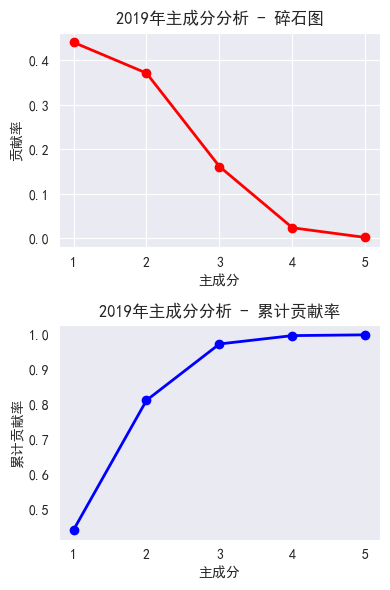

In [21]:
PC_values2 = np.arange(pca_data2.n_components_)+1 # 主成分顺序
fig, axes = plt.subplots(2,1, figsize=(4,6))
axes[0].plot(PC_values2, df_res2.loc["贡献率",:], 'ro-', linewidth=2)
axes[0].set_xticks(PC_values2)
axes[0].set_title('2019年主成分分析 - 碎石图')
axes[0].set_xlabel('主成分'); axes[0].set_ylabel('贡献率')
axes[1].plot(PC_values2, df_res2.loc["累计贡献率",:], 
'bo-', linewidth=2)
axes[1].set_xticks(PC_values2)
axes[1].set_title('2019年主成分分析 - 累计贡献率')
axes[1].set_xlabel('主成分'); axes[1].set_ylabel('累计贡献率')
plt.grid() # 添加网格
plt.tight_layout() # 调整多图间距，避免重叠
plt.show()

Text(0.5, 1.0, '2019年主成分1 和 主成分2 得分含义')

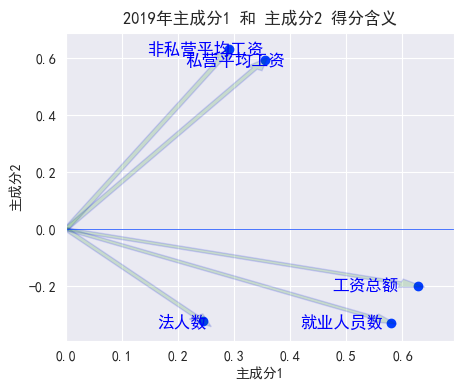

In [22]:
plt.subplots(figsize=(5,4)) # 绘制 成分散点图 —— 分析内涵
c_x2 = df_res2.loc[df_data2.columns[0:],"特征1"] # 提取特征数据
c_y2 = df_res2.loc[df_data2.columns[0:],"特征2"]
plt.scatter(c_x2,c_y2)
plt.xlim(0,np.max(c_x2)*1.1) # 将绘图范围放宽，以免文字被挤压
for i in range(len(c_x2)):
    plt.arrow(0, 0,c_x2[i]*0.95, c_y2[i]*0.95, color='b', alpha=0.15, width=0.01,fc='g')
    plt.text(c_x2[i]*0.85, c_y2[i], df_data2.columns[i], color='b', ha='center', va='center',fontsize=12)
plt.xlabel("主成分{}".format(1))
plt.ylabel("主成分{}".format(2))
plt.hlines(0,0,np.max(c_x2)*1.1, linewidth=0.5)
plt.title("2019年主成分{} 和 主成分{} 得分含义".format(1,2))

Text(0.5, 1.0, '2019年特征向量热力图')

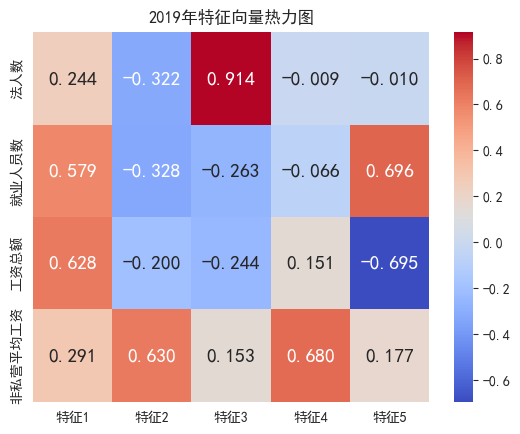

In [23]:
sns.heatmap(df_res2.head(4), annot=True, fmt=".3f", annot_kws={ "size":14},cmap="coolwarm") # 提取特征向量值
plt.title("2019年特征向量热力图")

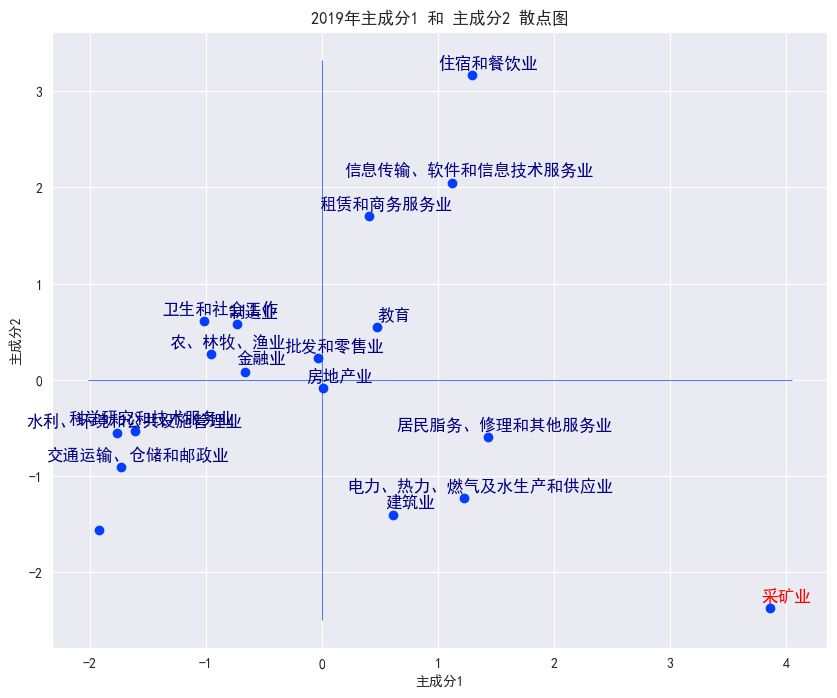

<Figure size 1920x1440 with 0 Axes>

In [24]:
plt.subplots(figsize=(10,8)) # 绘制 成分得分值图 —— 分析内涵
p_x2=df_pc2.iloc[:,0]; p_y2=df_pc2.iloc[:,1] # 选择主成分
R_x2 = np.max(p_x2)-np.min(p_x2) # range of p_x
R_y2 = np.max(p_y2)-np.min(p_y2) # range of p_y
plt.scatter(p_x2,p_y2)
d_pian = 0.05 # 标注文字时做一定偏移，避免覆盖散点
for i in range(1,len(df_pc2)):
    if np.max(p_x2) == p_x2[i] or np.min(p_x2) == p_x2[i]:
        plt.text(p_x2[i] + R_x2*d_pian/2, p_y2[i]+ R_y2*d_pian/2, df_pc2.index[i-1], color='red', ha='center', va='center',fontsize=12)
    else:
        plt.text(p_x2[i] + R_x2*d_pian/2, p_y2[i]+ R_y2*d_pian/2, df_pc2.index[i-1], color='navy', ha='center', va='center',fontsize=12)
plt.xlabel("主成分{}".format(1)); plt.ylabel("主成分{}".format(2))
plt.hlines(0,np.min(p_x2)*(1+d_pian),np.max(p_x2)*(1+d_pian), linewidth=0.5)
plt.vlines(0,np.min(p_y2)*(1+d_pian),np.max(p_y2)*(1+d_pian), linewidth=0.5)
plt.title("2019年主成分{} 和 主成分{} 散点图".format(1,2))
plt.figure(dpi=300)
plt.show()

In [25]:
# 去掉df_res中的特征3-5
df_res2 = df_res2.drop(["特征3", "特征4", "特征5"], axis=1)
df_pc2 = df_pc2.drop(["特征3", "特征4", "特征5"], axis=1)
df_pc2["总得分"] = df_pc2["特征1"]/df_res2.loc["特征值", "特征1"] + \
    df_pc2["特征2"]/df_res2.loc["特征值", "特征2"]
df_pc2 = df_pc2.drop(["特征1", "特征2"], axis=1)
df_pc2

,总得分
行业,
农、林牧、渔业,-1.711867
采矿业,-0.288263
制造业,0.473178
电力、热力、燃气及水生产和供应业,-0.023125
建筑业,-0.107203
批发和零售业,-0.477080
交通运输、仓储和邮政业,0.106446
住宿和餐饮业,-1.272585
信息传输、软件和信息技术服务业,2.292002


In [26]:
file_path = path_data + "homework2.xlsx"
df_data3 = pd.read_excel(file_path, sheet_name="2020", index_col=0) # 读取数据，指定第1列为索引
pca_data3 = PCA() # 建立模型，用 PCA(n_components=2) 可指定主成分数目
df_tem3 = df_data3.apply(stats.zscore,ddof=1) # 前面进行标准化处理的数据集
principalComponents3=pca_data3.fit_transform(df_tem3)# 训练模型得PCA参数、得分
col_name3 = ["特征"+str(i) for i in range(1,pca_data3.n_components_+1)]
# 自动生成 特征名称
df_res3 = pd.DataFrame(pca_data3.components_.T, columns=col_name3, index=df_data3.columns[0:]) # 先转置，列为 特征名称, 行为变量名
df_res3.loc["特征值",:] = pca_data3.n_components_ * pca_data3.explained_variance_ / pca_data3.explained_variance_.sum()# 归一化处理， (若为协方差矩阵)原始数据 之和 不等于 变量个数
df_res3.loc["贡献率",:] = pca_data3.explained_variance_ratio_
df_res3.loc["累计贡献率",:] = np.cumsum(pca_data3.explained_variance_ratio_)
display(df_res3)

,特征1,特征2,特征3,特征4,特征5
法人数,0.240782,-0.350360,0.905038,-0.004508,-0.012605
就业人员数,0.568906,-0.338840,-0.273679,-0.136355,0.684135
工资总额,0.621144,-0.210231,-0.255256,0.186633,-0.685562
非私营平均工资,0.323446,0.610506,0.156805,0.667500,0.229172
私营平均工资,0.357677,0.587810,0.127528,-0.707812,-0.096360
特征值,2.221215,1.873277,0.782903,0.111259,0.011346
贡献率,0.444243,0.374655,0.156581,0.022252,0.002269
累计贡献率,0.444243,0.818898,0.975479,0.997731,1.000000


In [27]:
file_path = path_data + "homework2.xlsx"
df_data1 = pd.read_excel(file_path, sheet_name="2018", index_col=0) # 读取数据，指定第1列为索引
pca_data1 = PCA() # 建立模型，用 PCA(n_components=2) 可指定主成分数目
df_tem1 = df_data1.apply(stats.zscore,ddof=1) # 前面进行标准化处理的数据集
principalComponents1=pca_data1.fit_transform(df_tem1)# 训练模型得PCA参数、得分
col_name1 = ["特征"+str(i) for i in range(1,pca_data1.n_components_+1)]
# 自动生成 特征名称
df_res1 = pd.DataFrame(pca_data1.components_.T, columns=col_name1, index=df_data1.columns[0:]) # 先转置，列为 特征名称, 行为变量名
df_res1.loc["特征值",:] = pca_data1.n_components_ * pca_data1.explained_variance_ / pca_data1.explained_variance_.sum()# 归一化处理， (若为协方差矩阵)原始数据 之和 不等于 变量个数
df_res1.loc["贡献率",:] = pca_data1.explained_variance_ratio_
df_res1.loc["累计贡献率",:] = np.cumsum(pca_data1.explained_variance_ratio_)
display(df_res1)

,特征1,特征2,特征3,特征4,特征5
法人数,0.352525,-0.163349,0.921403,0.004465,-0.006306
就业人员数,0.606415,-0.253299,-0.271753,-0.079163,0.698559
工资总额,0.635569,-0.133708,-0.272459,0.185723,-0.685162
非私营平均工资,0.176858,0.687008,0.052171,0.675995,0.192482
私营平均工资,0.269740,0.647533,0.014523,-0.708696,-0.074026
特征值,2.225977,1.830025,0.794522,0.140354,0.009122
贡献率,0.445195,0.366005,0.158904,0.028071,0.001824
累计贡献率,0.445195,0.811200,0.970105,0.998176,1.000000


In [28]:
df_pc1 = pd.DataFrame(data=principalComponents1, columns=col_name1) # 主成分得分值
df_pc1 = df_pc1.set_index(df_data1.index).copy() # 重新设置序号，以原始数据序号为准
df_pc1

,特征1,特征2,特征3,特征4,特征5
行业,,,,,
农、林牧、渔业,-1.783499,-1.670150,-0.219407,-0.268057,-0.083366
采矿业,-0.970669,-0.174491,-0.377805,0.261757,0.055280
制造业,4.316188,-1.773526,-0.500936,0.062876,-0.033945
电力、热力、燃气及水生产和供应业,-0.844972,0.279694,-0.319394,0.698003,0.121160
建筑业,1.749930,-1.114178,-0.796579,-0.580219,0.237014
批发和零售业,0.991016,-0.939785,3.121727,0.229480,-0.007879
交通运输、仓储和邮政业,-0.070115,0.206064,-0.308419,0.020305,-0.035210
住宿和餐饮业,-1.482587,-1.222238,-0.119571,-0.223527,-0.032647
信息传输、软件和信息技术服务业,0.765986,3.414040,0.176843,-0.490896,-0.007071


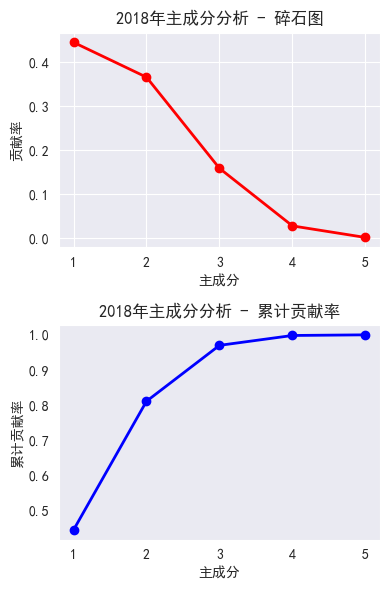

In [29]:
PC_values1 = np.arange(pca_data1.n_components_)+1 # 主成分顺序
fig, axes = plt.subplots(2,1, figsize=(4,6))
axes[0].plot(PC_values1, df_res1.loc["贡献率",:], 'ro-', linewidth=2)
axes[0].set_xticks(PC_values1)
axes[0].set_title('2018年主成分分析 - 碎石图')
axes[0].set_xlabel('主成分'); axes[0].set_ylabel('贡献率')
axes[1].plot(PC_values1, df_res1.loc["累计贡献率",:], 
'bo-', linewidth=2)
axes[1].set_xticks(PC_values1)
axes[1].set_title('2018年主成分分析 - 累计贡献率')
axes[1].set_xlabel('主成分'); axes[1].set_ylabel('累计贡献率')
plt.grid() # 添加网格
plt.tight_layout() # 调整多图间距，避免重叠
plt.show()

Text(0.5, 1.0, '2018年主成分1 和 主成分2 得分含义')

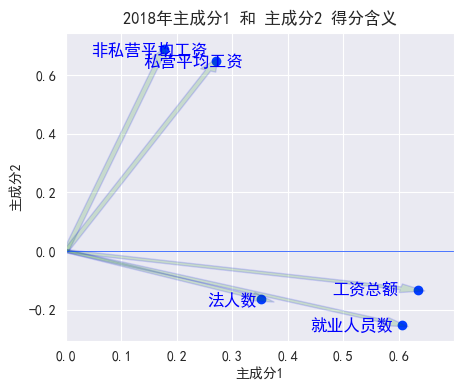

In [30]:
plt.subplots(figsize=(5,4)) # 绘制 成分散点图 —— 分析内涵
c_x1 = df_res1.loc[df_data1.columns[0:],"特征1"] # 提取特征数据
c_y1 = df_res1.loc[df_data1.columns[0:],"特征2"]
plt.scatter(c_x1,c_y1)
plt.xlim(0,np.max(c_x1)*1.1) # 将绘图范围放宽，以免文字被挤压
for i in range(len(c_x1)):
    plt.arrow(0, 0,c_x1[i]*0.95, c_y1[i]*0.95, color='b', alpha=0.15, width=0.01,fc='g')
    plt.text(c_x1[i]*0.85, c_y1[i], df_data1.columns[i], color='b', ha='center', va='center',fontsize=12)
plt.xlabel("主成分{}".format(1))
plt.ylabel("主成分{}".format(2))
plt.hlines(0,0,np.max(c_x1)*1.1, linewidth=0.5)
plt.title("2018年主成分{} 和 主成分{} 得分含义".format(1,2))

Text(0.5, 1.0, '2018年特征向量热力图')

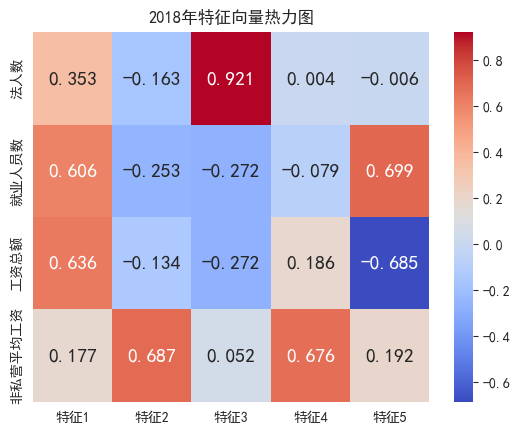

In [31]:
sns.heatmap(df_res1.head(4), annot=True, fmt=".3f", annot_kws={ "size":14},cmap="coolwarm") # 提取特征向量值
plt.title("2018年特征向量热力图")

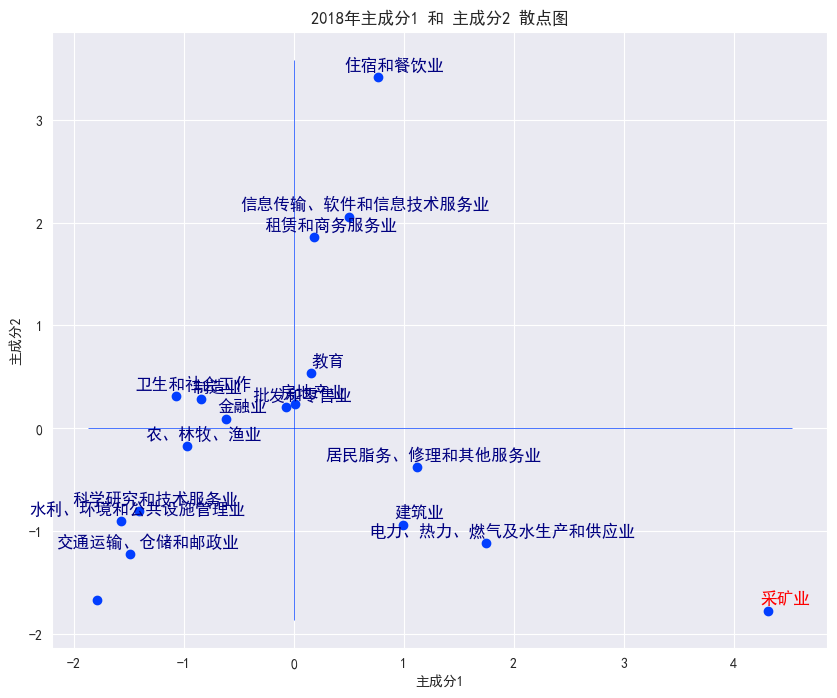

<Figure size 1920x1440 with 0 Axes>

In [32]:
plt.subplots(figsize=(10,8)) # 绘制 成分得分值图 —— 分析内涵
p_x1=df_pc1.iloc[:,0]; p_y1=df_pc1.iloc[:,1] # 选择主成分
R_x1 = np.max(p_x1)-np.min(p_x1) # range of p_x
R_y1 = np.max(p_y1)-np.min(p_y1) # range of p_y
plt.scatter(p_x1,p_y1)
d_pian = 0.05 # 标注文字时做一定偏移，避免覆盖散点
for i in range(1,len(df_pc1)):
    if np.max(p_x1) == p_x1[i] or np.min(p_x1) == p_x1[i]:
        plt.text(p_x1[i] + R_x1*d_pian/2, p_y1[i]+ R_y1*d_pian/2, df_pc1.index[i-1], color='red', ha='center', va='center',fontsize=12)
    else:
        plt.text(p_x1[i] + R_x1*d_pian/2, p_y1[i]+ R_y1*d_pian/2, df_pc1.index[i-1], color='navy', ha='center', va='center',fontsize=12)
plt.xlabel("主成分{}".format(1)); plt.ylabel("主成分{}".format(2))
plt.hlines(0,np.min(p_x1)*(1+d_pian),np.max(p_x1)*(1+d_pian), linewidth=0.5)
plt.vlines(0,np.min(p_y1)*(1+d_pian),np.max(p_y1)*(1+d_pian), linewidth=0.5)
plt.title("2018年主成分{} 和 主成分{} 散点图".format(1,2))
plt.figure(dpi=300)
plt.show()

In [33]:
# 去掉df_res中的特征3-5
df_res1 = df_res1.drop(["特征3", "特征4", "特征5"], axis=1)
df_pc1 = df_pc1.drop(["特征3", "特征4", "特征5"], axis=1)
df_pc1["总得分"] = df_pc1["特征1"]/df_res1.loc["特征值", "特征1"] + \
    df_pc1["特征2"]/df_res1.loc["特征值", "特征2"]
df_pc1 = df_pc1.drop(["特征1", "特征2"], axis=1)
df_pc1

,总得分
行业,
农、林牧、渔业,-1.713858
采矿业,-0.531413
制造业,0.969882
电力、热力、燃气及水生产和供应业,-0.226760
建筑业,0.177308
批发和零售业,-0.068331
交通运输、仓储和邮政业,0.081103
住宿和餐饮业,-1.333919
信息传输、软件和信息技术服务业,2.209682


In [34]:
df_pc3 = pd.DataFrame(data=principalComponents3, columns=col_name3) # 主成分得分值
df_pc3 = df_pc3.set_index(df_data3.index).copy() # 重新设置序号，以原始数据序号为准
df_pc3

,特征1,特征2,特征3,特征4,特征5
行业,,,,,
农、林牧、渔业,-1.843458,-1.331584,0.535713,-0.155188,-0.111908
采矿业,-0.893403,0.386359,-0.339903,0.119333,0.067745
制造业,3.850769,-2.484335,-0.317343,-0.168291,0.024301
电力、热力、燃气及水生产和供应业,-0.374475,1.089709,-0.197275,0.088235,0.078367
建筑业,1.005164,-1.146651,-0.774260,-0.549096,0.224469
批发和零售业,0.611836,-1.328408,2.960618,0.205986,-0.019329
交通运输、仓储和邮政业,-0.073333,0.176313,-0.333328,0.114333,-0.000912
住宿和餐饮业,-1.835148,-0.933115,-0.412188,-0.304100,-0.064502
信息传输、软件和信息技术服务业,1.558785,3.353474,0.586570,-0.340073,-0.012809


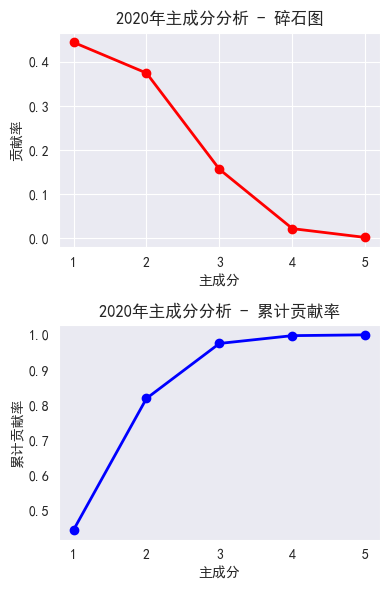

In [35]:
PC_values3 = np.arange(pca_data3.n_components_)+1 # 主成分顺序
fig, axes = plt.subplots(2,1, figsize=(4,6))
axes[0].plot(PC_values3, df_res3.loc["贡献率",:], 'ro-', linewidth=2)
axes[0].set_xticks(PC_values3)
axes[0].set_title('2020年主成分分析 - 碎石图')
axes[0].set_xlabel('主成分'); axes[0].set_ylabel('贡献率')
axes[1].plot(PC_values3, df_res3.loc["累计贡献率",:], 
'bo-', linewidth=2)
axes[1].set_xticks(PC_values3)
axes[1].set_title('2020年主成分分析 - 累计贡献率')
axes[1].set_xlabel('主成分'); axes[1].set_ylabel('累计贡献率')
plt.grid() # 添加网格
plt.tight_layout() # 调整多图间距，避免重叠
plt.show()

Text(0.5, 1.0, '2020年主成分1 和 主成分2 得分含义')

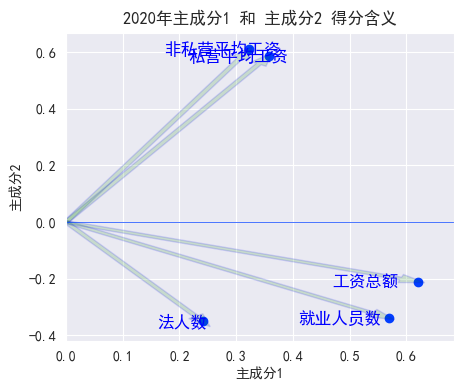

In [36]:
plt.subplots(figsize=(5,4)) # 绘制 成分散点图 —— 分析内涵
c_x3 = df_res3.loc[df_data3.columns[0:],"特征1"] # 提取特征数据
c_y3 = df_res3.loc[df_data3.columns[0:],"特征2"]
plt.scatter(c_x3,c_y3)
plt.xlim(0,np.max(c_x3)*1.1) # 将绘图范围放宽，以免文字被挤压
for i in range(len(c_x3)):
    plt.arrow(0, 0,c_x3[i]*0.95, c_y3[i]*0.95, color='b', alpha=0.15, width=0.01,fc='g')
    plt.text(c_x3[i]*0.85, c_y3[i], df_data3.columns[i], color='b', ha='center', va='center',fontsize=12)
plt.xlabel("主成分{}".format(1))
plt.ylabel("主成分{}".format(2))
plt.hlines(0,0,np.max(c_x3)*1.1, linewidth=0.5)
plt.title("2020年主成分{} 和 主成分{} 得分含义".format(1,2))

Text(0.5, 1.0, '2020年特征向量热力图')

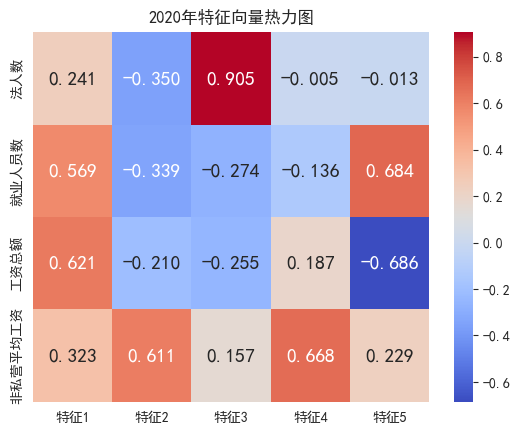

In [37]:
sns.heatmap(df_res3.head(4), annot=True, fmt=".3f", annot_kws={ "size":14},cmap="coolwarm") # 提取特征向量值
plt.title("2020年特征向量热力图")

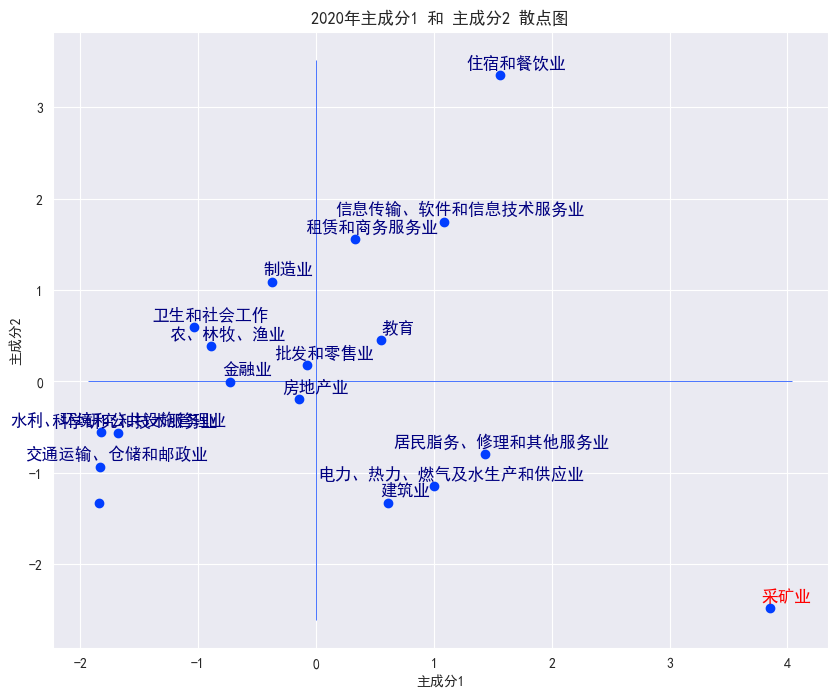

<Figure size 1920x1440 with 0 Axes>

In [38]:
plt.subplots(figsize=(10,8)) # 绘制 成分得分值图 —— 分析内涵
p_x3=df_pc3.iloc[:,0]; p_y3=df_pc3.iloc[:,1] # 选择主成分
R_x3 = np.max(p_x3)-np.min(p_x3) # range of p_x
R_y3 = np.max(p_y3)-np.min(p_y3) # range of p_y
plt.scatter(p_x3,p_y3)
d_pian = 0.05 # 标注文字时做一定偏移，避免覆盖散点
for i in range(1,len(df_pc3)):
    if np.max(p_x3) == p_x3[i] or np.min(p_x3) == p_x3[i]:
        plt.text(p_x3[i] + R_x3*d_pian/2, p_y3[i]+ R_y3*d_pian/2, df_pc3.index[i-1], color='red', ha='center', va='center',fontsize=12)
    else:
        plt.text(p_x3[i] + R_x3*d_pian/2, p_y3[i]+ R_y3*d_pian/2, df_pc3.index[i-1], color='navy', ha='center', va='center',fontsize=12)
plt.xlabel("主成分{}".format(1)); plt.ylabel("主成分{}".format(2))
plt.hlines(0,np.min(p_x3)*(1+d_pian),np.max(p_x3)*(1+d_pian), linewidth=0.5)
plt.vlines(0,np.min(p_y3)*(1+d_pian),np.max(p_y3)*(1+d_pian), linewidth=0.5)
plt.title("2020年主成分{} 和 主成分{} 散点图".format(1,2))
plt.figure(dpi=300)
plt.show()

In [39]:
# 去掉df_res中的特征3-5
df_res3 = df_res3.drop(["特征3", "特征4", "特征5"], axis=1)
df_pc3 = df_pc3.drop(["特征3", "特征4", "特征5"], axis=1)
df_pc3["总得分"] = df_pc3["特征1"]/df_res3.loc["特征值", "特征1"] + \
    df_pc3["特征2"]/df_res3.loc["特征值", "特征2"]
df_pc3 = df_pc3.drop(["特征1", "特征2"], axis=1)
df_pc3

,总得分
行业,
农、林牧、渔业,-1.540764
采矿业,-0.195966
制造业,0.407435
电力、热力、燃气及水生产和供应业,0.413123
建筑业,-0.159581
批发和零售业,-0.433685
交通运输、仓储和邮政业,0.061105
住宿和餐饮业,-1.324310
信息传输、软件和信息技术服务业,2.491936


In [40]:
df_pc4 = pd.concat([df_pc, df_pc1, df_pc2, df_pc3], axis=1)
df_pc4.columns = ["2017", "2018", "2019", "2020"]
df_pc4

,2017,2018,2019,2020
行业,,,,
农、林牧、渔业,-1.460902,-1.713858,-1.711867,-1.540764
采矿业,-0.664414,-0.531413,-0.288263,-0.195966
制造业,2.138524,0.969882,0.473178,0.407435
电力、热力、燃气及水生产和供应业,-0.386300,-0.226760,-0.023125,0.413123
建筑业,0.637698,0.177308,-0.107203,-0.159581
批发和零售业,0.075733,-0.068331,-0.477080,-0.433685
交通运输、仓储和邮政业,0.000879,0.081103,0.106446,0.061105
住宿和餐饮业,-1.309941,-1.333919,-1.272585,-1.324310
信息传输、软件和信息技术服务业,1.630923,2.209682,2.292002,2.491936


In [41]:
df_pc5 = df_pc4.copy()
df_pc5["2019+2020"] = df_pc4["2020"] + df_pc4["2019"]
df_pc5["2017+2018"] = df_pc4["2017"] + df_pc4["2018"]
df_pc5["2019+2020-2017+2018"] = df_pc5["2019+2020"] - df_pc5["2017+2018"]
df_pc5 = df_pc5.sort_values(by="2019+2020-2017+2018", ascending=False)
df_pc5

,2017,2018,2019,2020,2019+2020,2017+2018,2019+2020-2017+2018
行业,,,,,,,
电力、热力、燃气及水生产和供应业,-0.386300,-0.226760,-0.023125,0.413123,0.389998,-0.613060,1.003058
信息传输、软件和信息技术服务业,1.630923,2.209682,2.292002,2.491936,4.783938,3.840605,0.943333
金融业,0.865822,1.350468,1.611966,1.421012,3.032978,2.216289,0.816689
采矿业,-0.664414,-0.531413,-0.288263,-0.195966,-0.484229,-1.195827,0.711597
文化、体育和娱乐业,-0.578778,-0.306696,-0.131676,-0.148857,-0.280532,-0.885474,0.604941
卫生和社会工作,0.247757,0.364002,0.512434,0.488006,1.000440,0.611759,0.388682
科学研究和技术服务业,0.728534,1.098348,1.099630,0.979124,2.078754,1.826882,0.251873
居民脂务、修理和其他服务业,-1.266049,-1.199497,-1.099728,-1.116515,-2.216243,-2.465546,0.249303
交通运输、仓储和邮政业,0.000879,0.081103,0.106446,0.061105,0.167551,0.081982,0.085569


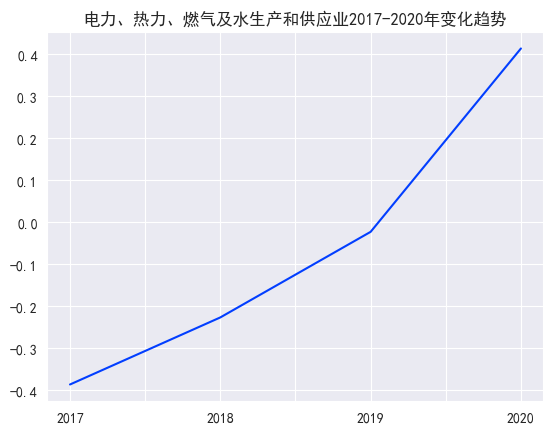

In [42]:
df_pc4 = df_pc4.T
df_pc4[df_pc5.index[0]].plot(title=df_pc5.index[0]+"2017-2020年变化趋势")
plt.show()

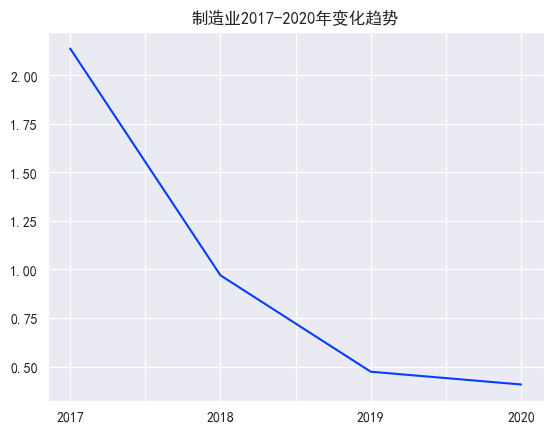

In [43]:
df_pc4[df_pc5.index[-1]].plot(title=df_pc5.index[-1]+"2017-2020年变化趋势")
plt.show()

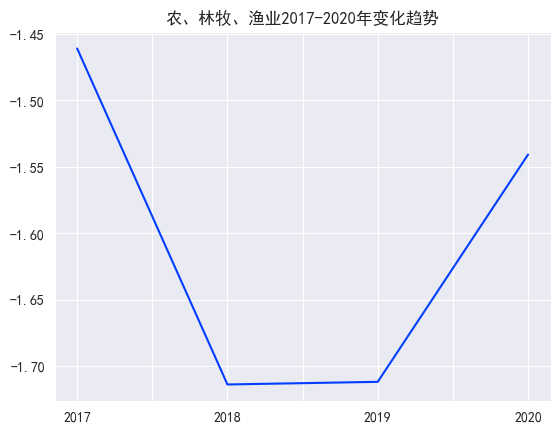

In [44]:
df_pc4[df_pc5.index[12]].plot(title=df_pc5.index[12]+"2017-2020年变化趋势")
plt.show()

In [45]:
df_pc5.index

Index(['电力、热力、燃气及水生产和供应业', '信息传输、软件和信息技术服务业', '金融业', '采矿业', '文化、体育和娱乐业',
       '卫生和社会工作', '科学研究和技术服务业', '居民脂务、修理和其他服务业', '交通运输、仓储和邮政业', '住宿和餐饮业',
       '水利、环境和公共设施管理业', '房地产业', '农、林牧、渔业', '教育', '租赁和商务服务业', '批发和零售业', '建筑业',
       '制造业'],
      dtype='object', name='行业')